In [1]:
import pandas as pd
from pandas import datetime
import matplotlib.pyplot as plt

<ipython-input-1-5b489f4d910b>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [2]:
def parser(x):
    return datetime.strptime(x, "%Y-%m")

sales = pd.read_csv("../sales-cars.csv", index_col=0, parse_dates=[0], date_parser=parser)

In [3]:
sales.head()


,Sales
Month,
2016-01-01,266
2016-02-01,146
2016-03-01,183
2016-04-01,119
2016-05-01,180


<AxesSubplot:xlabel='Month'>

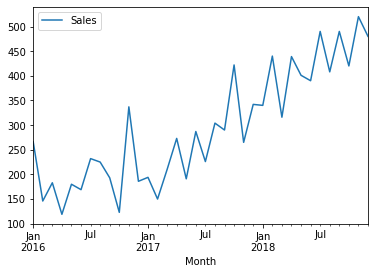

In [4]:
sales.plot()

In [5]:
## Stationarity
# means mean, variance and covariance is constant over periods. 


In [6]:
sales_diff = sales.diff(periods=1)
sales_diff = sales_diff[1:]
sales_diff.head()

,Sales
Month,
2016-02-01,-120.0
2016-03-01,37.0
2016-04-01,-64.0
2016-05-01,61.0
2016-06-01,-11.0


In [7]:
from statsmodels.graphics.tsaplots import plot_acf

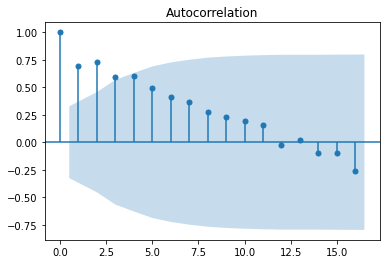

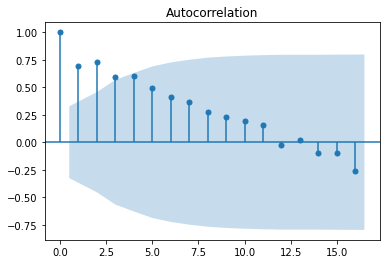

In [8]:
plot_acf(sales)

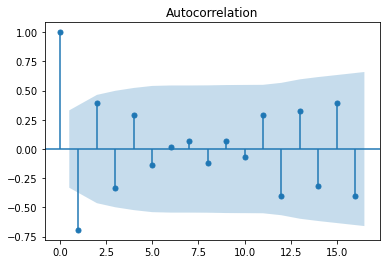

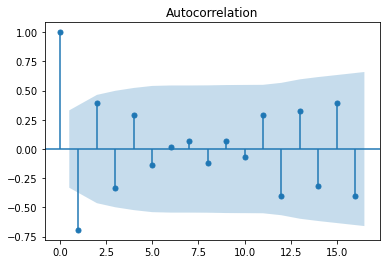

In [9]:
plot_acf(sales_diff)

<AxesSubplot:xlabel='Month'>

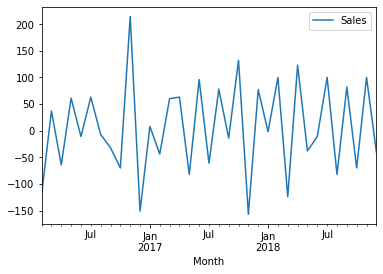

In [10]:
sales_diff.plot()

In [11]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

In [12]:
X = sales.values
train = X[0:27]
test = X[26:]
predictions = []

In [13]:
model_ar = AR(train)
model_ar_fit = model_ar.fit()

/Users/aslak/Library/Caches/pypoetry/virtualenvs/ideal-pancake-LPxB82nx-py3.8/lib/python3.8/site-packages/statsmodels/tsa/ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWa

In [14]:
predictions = model_ar_fit.predict(start=27, end=36)

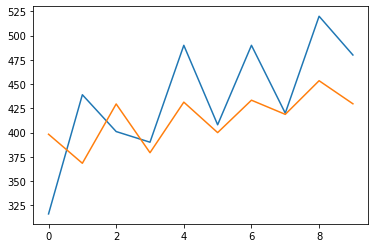

In [15]:

plt.plot(test)
plt.plot(predictions)

In [16]:
from statsmodels.tsa.arima.model import ARIMA

In [17]:
model_arima = ARIMA(train, order=(3, 2, 3))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)


288.0652412789347


/Users/aslak/Library/Caches/pypoetry/virtualenvs/ideal-pancake-LPxB82nx-py3.8/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [18]:
predictions = model_arima_fit.forecast(steps=10)
print(predictions)

[381.42936187 334.6051144  420.44612543 391.74672874 408.24422961
 375.34318822 414.38356054 426.14137866 444.74856812 424.28027574]


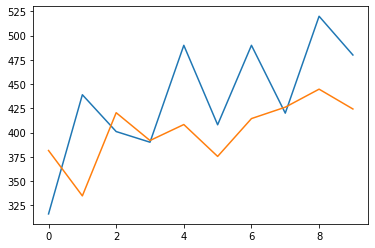

In [19]:
plt.plot(test)
plt.plot(predictions)

In [20]:
import itertools
p=d=q=range(0, 5)
pdq=list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [24]:
import warnings
warnings.filterwarnings("ignore")
        
import math
aics = []

best_param = (0,0,0)
best_aic = math.inf
for param in pdq:
    try:
        model_arima = ARIMA(train, order=param)
        model_arima_fit = model_arima.fit()
        aic = model_arima_fit.aic
        if (aic < best_aic):
            best_aic = aic
            best_param = param
            print(param, model_arima_fit.aic, "new best fit")
        else:
            print(param, model_arima_fit.aic)
            
        aics.append(model_arima_fit.aic)
    except Exception as e:
        print(e)
        continue
print(best_param, best_aic, "Completed, best fit")

(0, 0, 0) 319.45286406147864 new best fit
(0, 0, 1) 318.72448140936064 new best fit
(0, 0, 2) 315.25060075530547 new best fit
(0, 0, 3) 316.385352470174
(0, 0, 4) 309.8163713692661 new best fit
(0, 1, 0) 309.84124796602856
(0, 1, 1) 298.32614632006397 new best fit
(0, 1, 2) 296.6105590316511 new best fit
(0, 1, 3) 297.6342506529151
(0, 1, 4) 299.0805206239961
(0, 2, 0) 327.18352274695803
(0, 2, 1) 304.1221724637494
(0, 2, 2) 290.55995422568975 new best fit
(0, 2, 3) 291.4957886799441
(0, 2, 4) 293.59179046087803
(0, 3, 0) 344.49465685685675
(0, 3, 1) 319.96668737041597
(0, 3, 2) 300.3727273077952
(0, 3, 3) 291.53040146905005
(0, 3, 4) 290.4241728584623 new best fit
(0, 4, 0) 360.5932760998339
(0, 4, 1) 335.03371908774415
(0, 4, 2) 313.7789268217239
(0, 4, 3) 297.4274855718829
(0, 4, 4) 289.6790105042382 new best fit
(1, 0, 0) 316.1668717557285
(1, 0, 1) 313.04871846520564
(1, 0, 2) 310.97906442393946
(1, 0, 3) 311.2885301556136
(1, 0, 4) 309.06861705888014
(1, 1, 0) 297.35922755917244


SyntaxError: invalid syntax (<ipython-input-22-95eb476c26b3>, line 1)